# Ex1 - Practical part
## Concentration Inequalities (Question 2.2)
---

Handle imports

In [77]:
import numpy as np
import matplotlib.pyplot as plt

generate the dataset: 100000 sequences of 1000 coin tosses

In [78]:
SEQUENCES = 10000
TOSSES = 1000

In [79]:
# epsilon values for the next questions
epsilons = [0.5,0.25,0.1,0.01,0.001]

data = np.array([np.random.binomial(1, eps, (SEQUENCES, TOSSES)) for eps in epsilons])
print(f"shape: {data.shape}")
print(data)

shape: (5, 10000, 1000)
[[[0 1 0 ... 1 1 1]
  [1 1 0 ... 0 1 1]
  [0 1 1 ... 0 0 1]
  ...
  [0 1 0 ... 1 0 0]
  [1 1 0 ... 1 1 0]
  [0 0 0 ... 1 0 1]]

 [[1 1 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [1 1 0 ... 0 1 0]]

 [[0 0 0 ... 1 0 0]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [80]:
# used as the x axis for the plots (1,...,TOSSES)
m = np.arange(TOSSES)+1

### (a) - Defining the Estimation
For the first 5 sequences of 1000 tosses (the first 5 rows in “data”), plot the estimate
X<sub>m</sub> as a function of m (i.e the mean of all tosses up to m). 1 figure with 5
plots (each row in a different color). What do you expect to see in this plot as `m` grows?


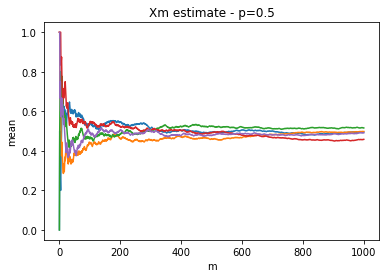

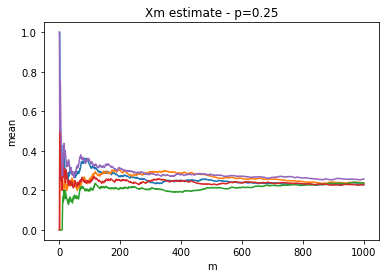

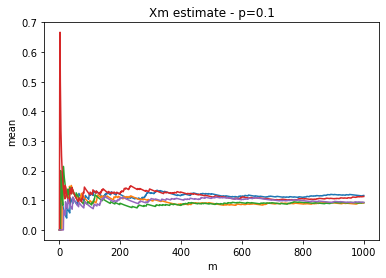

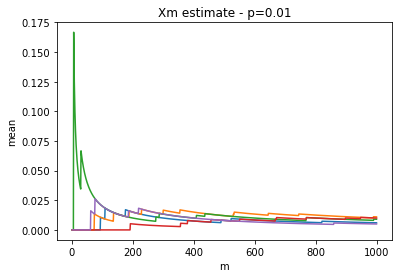

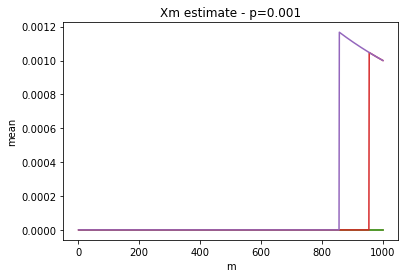

In [81]:
ESTIMATION_SIZE = 5
EPS_LEN = len(epsilons)

estimations = np.empty((EPS_LEN,ESTIMATION_SIZE,TOSSES),float)
for i in range(EPS_LEN):
    # run the estimation on a ESTIMATION_SIZE sequences of the dataset
    estimations[i] = data[i,:ESTIMATION_SIZE,:].cumsum(axis=1) / m

    # plot estimations for every sequence of the first ESTIMATION_SIZE sequences
    plt.figure()
    for estimation in estimations[i]:
        plt.plot(m, estimation)

    plt.title(f"Xm estimate - p={epsilons[i]}")
    plt.xlabel('m')
    plt.ylabel('mean')
    # plt.ylim(0, 1)
    plt.show()

As expected, and as stated by the law of large numbers, the larger the sample size (m), the closer the
average (Xm) will be to expected value of the coin - which seems to be ~epsilon.

### (b) Upper bounds
For each bound (Chebyshev and Hoeffding seen in class) and for each ε, plot the upper
bound on `Pr(|X-E[X]|≥ε)` (derived in class) as a function of m (where m
ranges from 1 to 1000). 5 figures with 2 plots each (mention in the title of each plot what
is `ε` and use a different color for each bound)

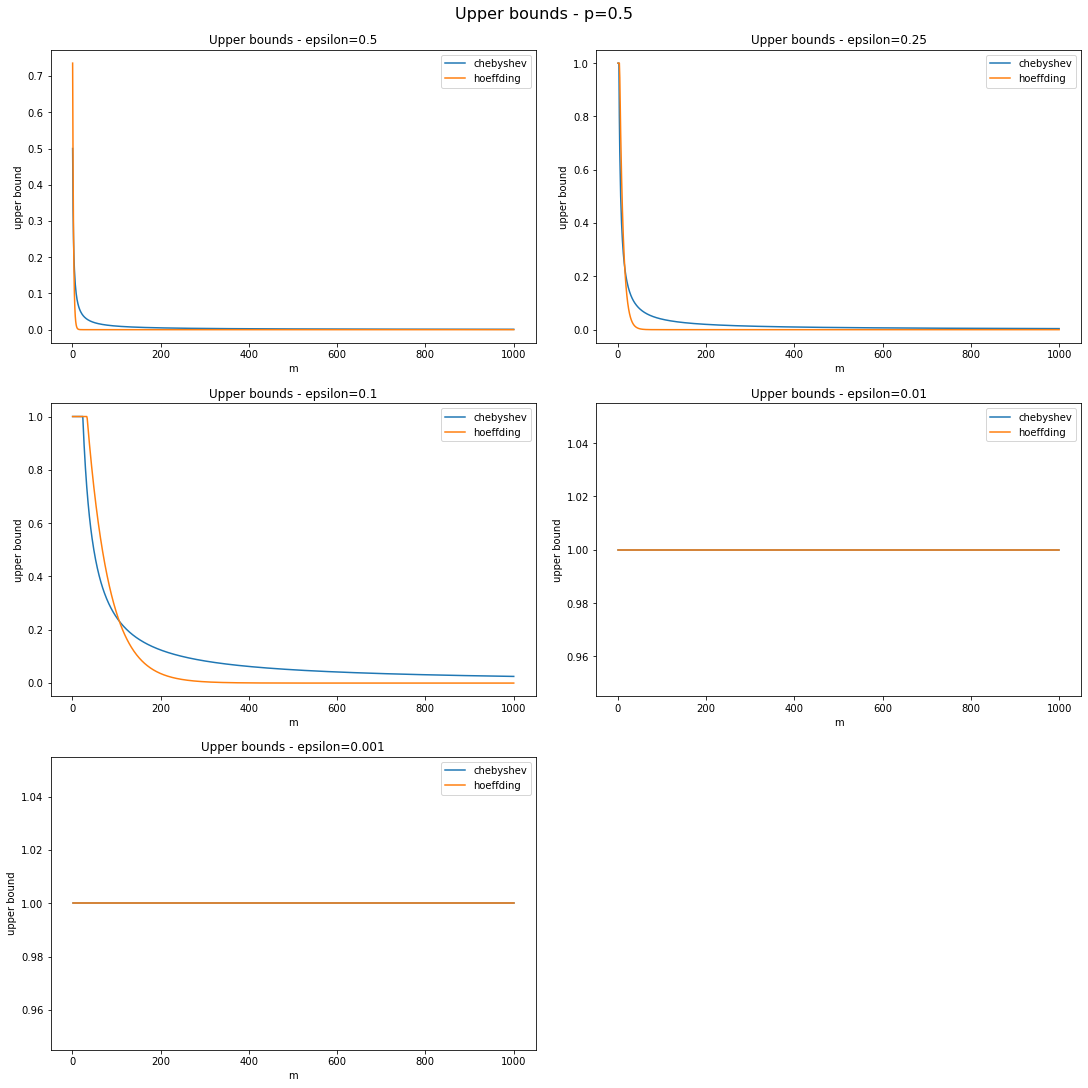

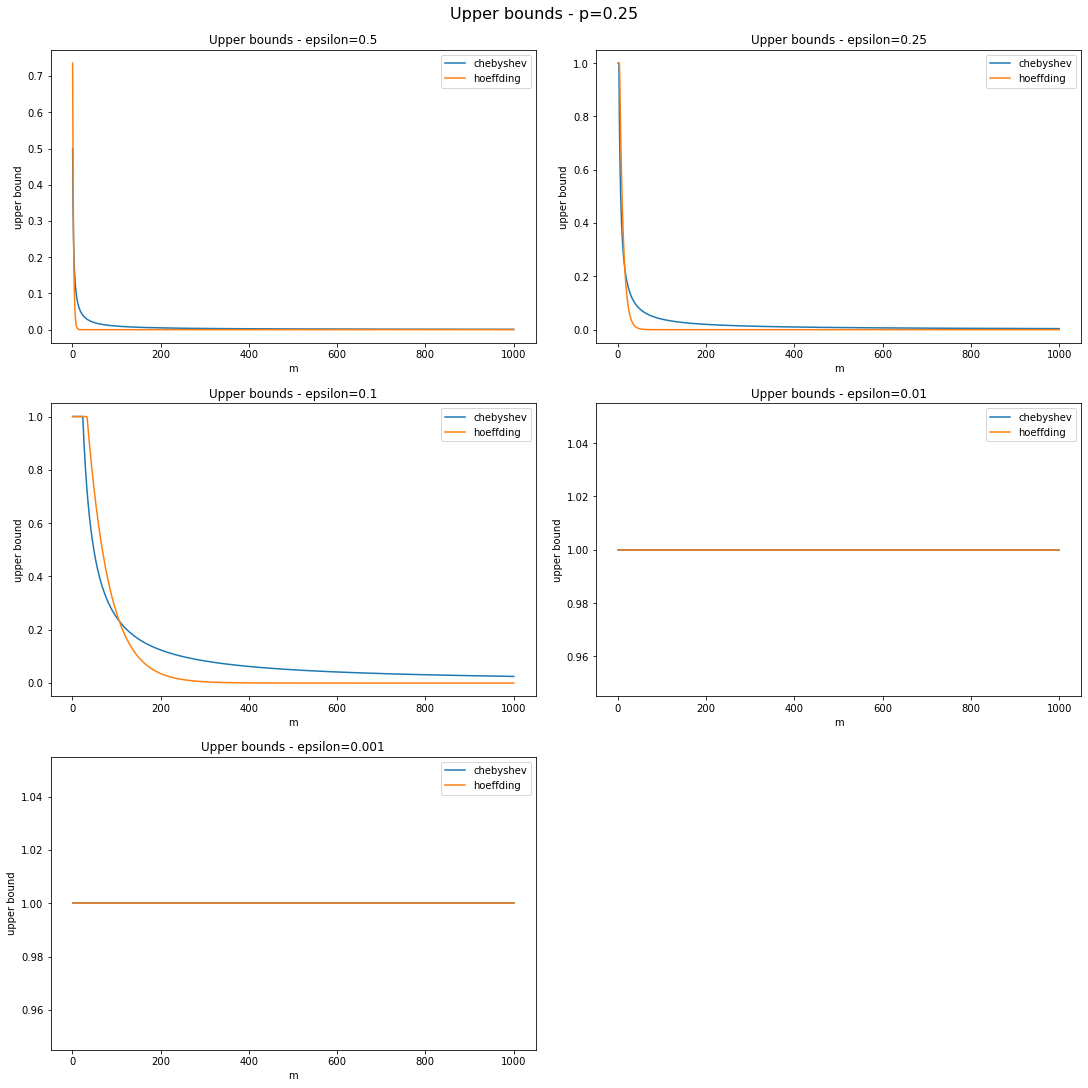

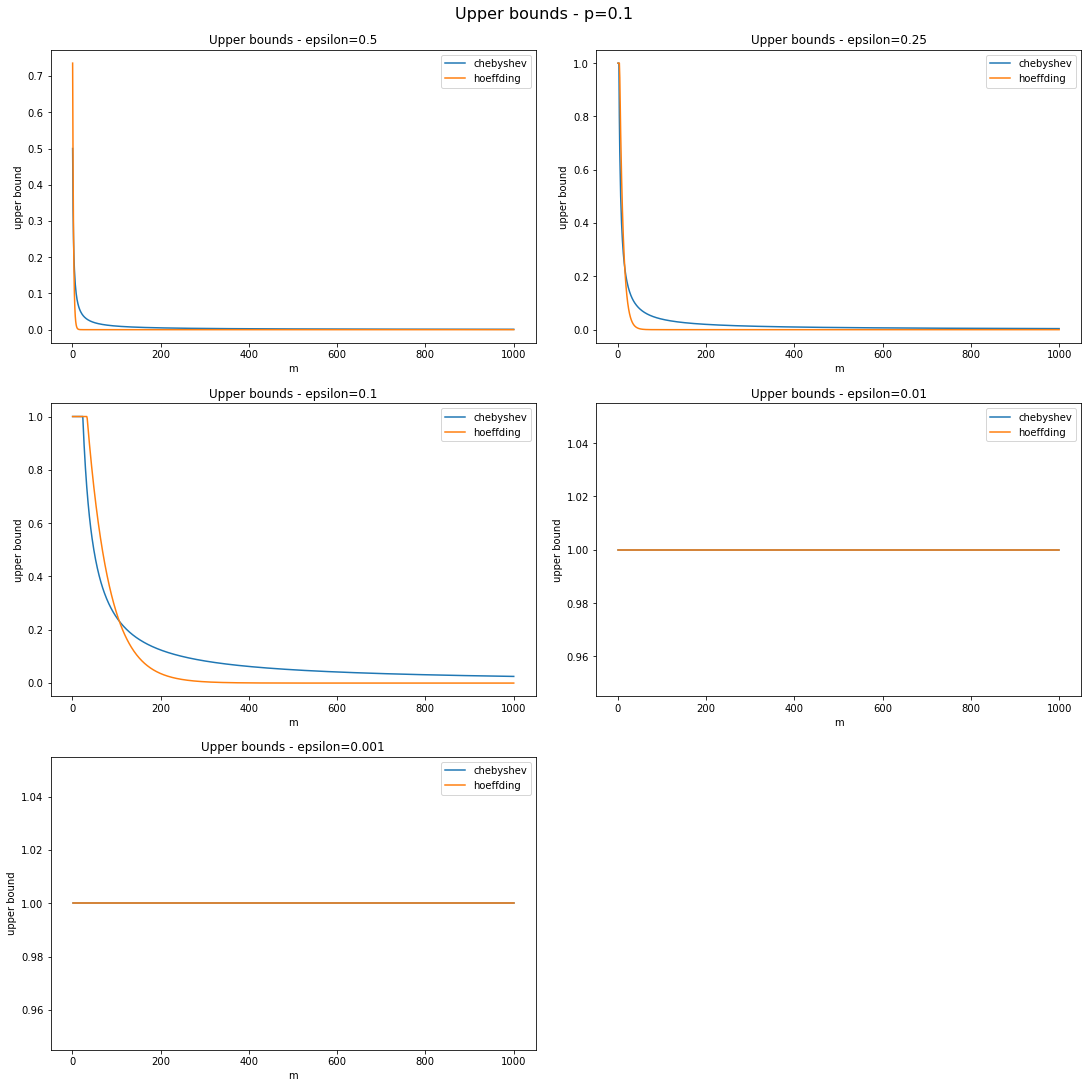

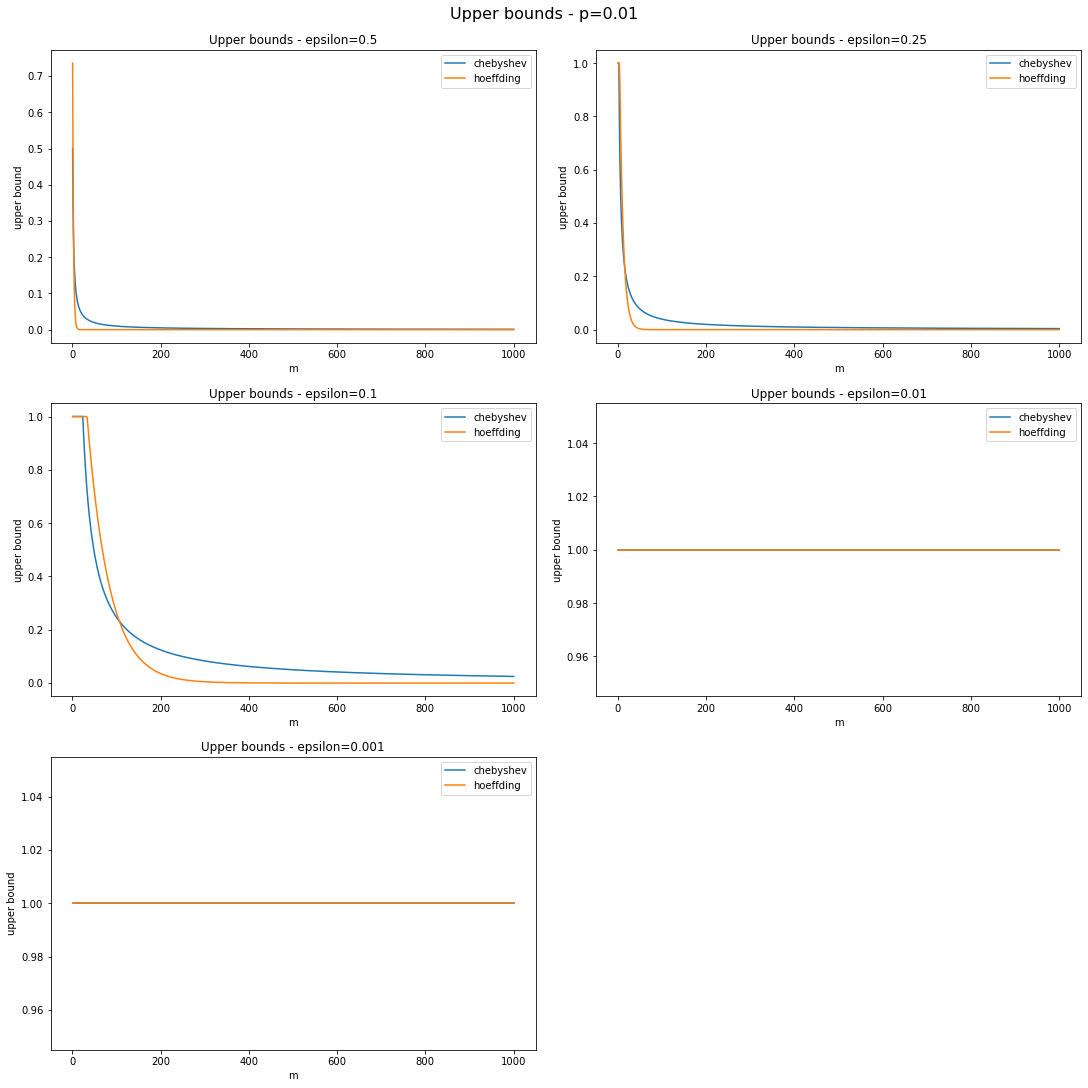

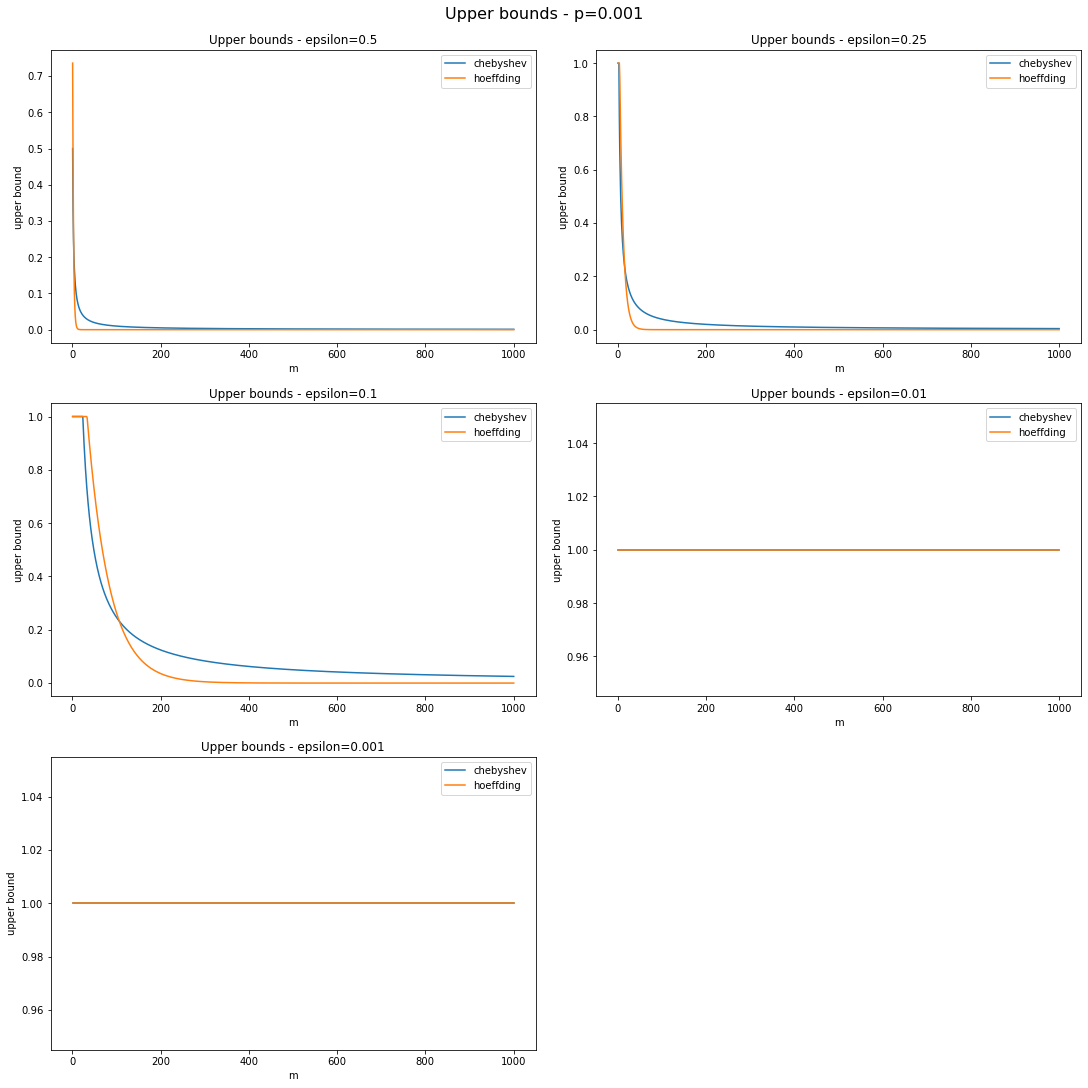

In [82]:
# np.var(arr)
chebyshev = lambda arr,e: min(1/(4*arr.size*(e**2)),1)
hoeffding = lambda arr,e: min(2*np.exp(-2*arr.size*(e**2)),1)

for i in range(EPS_LEN):
    seq = estimations[i][0]
    fig, axs = plt.subplots(3, 2, figsize=(15,15), edgecolor="#e4e6e8", constrained_layout=True)
    for j, eps in enumerate(epsilons):
        ax = axs[int(j/2),(j%2)]
        ax.plot(m, [chebyshev(seq[:i+1], eps) for i in m], label='chebyshev')
        ax.plot(m, [hoeffding((seq[:i+1]), eps) for i in m], label='hoeffding')
        ax.legend()
        ax.set_xlabel("m")
        ax.set_ylabel("upper bound")
        ax.set_title(f"Upper bounds - epsilon={eps}")
    fig.delaxes(axs[2, 1])
    fig.suptitle(f"Upper bounds - p={epsilons[i]}", fontsize=16)
    # plt.tight_layout()
    plt.show()

### (c) Actual bounds
You are now told that p = 0.25. On top of the figures from the previous question, plot
the percentage of sequences that satisfy `|X-E[X]|≥ε` as a function of m (now you
know `E[X]` = p = 0.25). What are you expecting to see in these plots? Explain

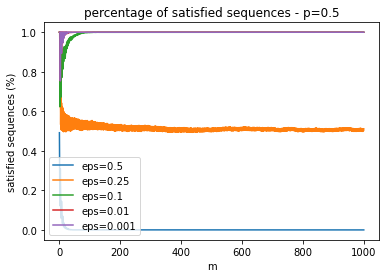

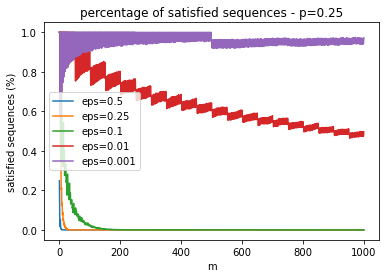

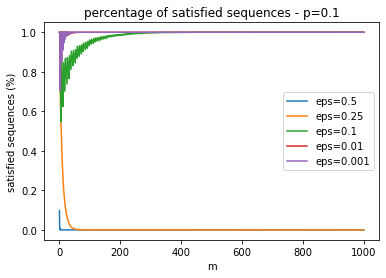

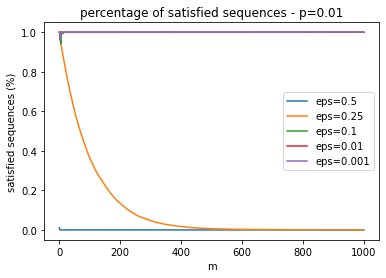

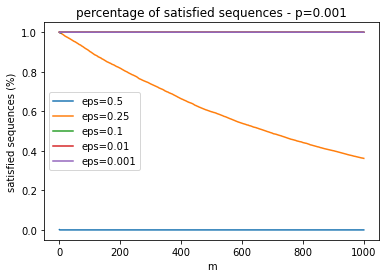

In [83]:
p = 0.25

for i in range(EPS_LEN):
    deltas = np.abs((data[i].cumsum(axis=1) / m)-p)

    plt.figure()
    for eps in epsilons:
        percentage = np.sum((deltas >= eps), axis=0)/SEQUENCES
        plt.plot(m, percentage, label=f"eps={eps}")
    plt.legend()
    plt.title(f"percentage of satisfied sequences - p={epsilons[i]}")
    plt.xlabel('m')
    plt.ylabel('satisfied sequences (%)')
    plt.show()

Now that we know as a matter of fact `E[X]=0.25`, I was expecting to see the plots converging to the value 0
as `m` grows larger, while also the larger the epsilon value is, the faster the plot will converge to 0 -
meaning almost all the Xm sequences estimated mean is in the epsilon range of the actual mean.<br/>
Exactly as stated by the law of large numbers.

As there are some datasets where p is in fact not 0.25, the plot fails to act as stated by the law of large numbers
 regarding those datasets.